In [1]:
import pandas
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import hist2d
import plotly.io as pio
from IPython.display import Image

df = pandas.read_pickle("../data/stats_star.xz")
df.drop(df[df["RUN"] <= 2].index, axis=0, inplace=True)
df.reset_index(inplace=True)

In [2]:
maxd = np.max(df["DURATION"].values)
df["WORKING"] = (maxd - df["DURATION"]) * df["DEATH"] + df["WORKING"]
df["WORKING"] = np.log10(df["WORKING"]/(maxd*df["NUM_AGENTS"]))

#### Generate function to visualize death vs. economic loss (for interactive version and not static graphs uncomment here)

In [3]:
def show_results(hist, w_steps, d_steps, colorbar):
    c_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

    fig = go.Figure(data=go.Heatmap(z=hist, x=w_steps, y=d_steps, hoverongaps = False, colorbar = colorbar))
    x_vals = [0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]
    y_vals = [0.01, 0.05, 0.1, 0.15, 0.2]

    fig.update_layout(
        xaxis = dict(
            tickmode = 'array',
            tickvals = [np.log10(v) for v in x_vals],
            ticktext = [f"{v *100:.0f} %" for v in x_vals],
            title = "Total workhours lost [%]"
        ),
        yaxis = dict(
            tickmode = 'array',
            tickvals = y_vals,
            ticktext = [f"{v *100} %" for v in y_vals],
            title = "People died [%]"
        )
    )
    #uncomment to get static version
    return Image(pio.to_image(fig, format='png'))
    #uncomment to get interactive version
    #fig.show()

## 2.c.ii Social distancing

### Sensitivity $D_{impact}$

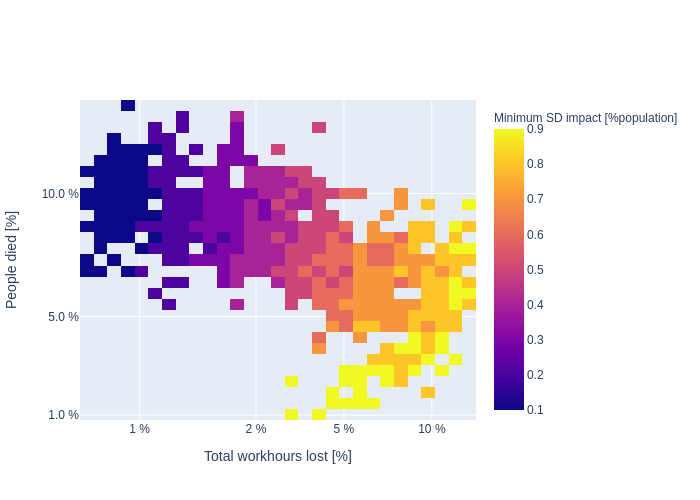

In [4]:
sub_df = df[df["RUN"] == 3]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=30, x="DEATH", y="WORKING", z="SD_IMPACT", reduce_op=np.min)
colorbar = dict(title="Minimum SD impact [%population]")
show_results(hist, w_steps, d_steps, colorbar)

Overall, $D_{impact}$ reduces the death_rate but prolongs economic_loss.

### Sensitivity $D_{start}$

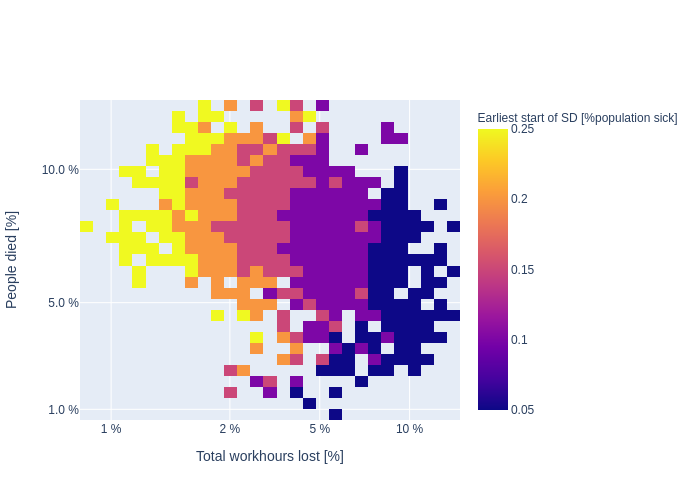

In [5]:
sub_df = df[df["RUN"] == 4]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=30, x="DEATH", y="WORKING", z="SD_START", reduce_op=np.min)
colorbar = dict(title="Earliest start of SD [%population sick]")
show_results(hist, w_steps, d_steps, colorbar)

Clearly, starting social distancing earlier reduces the death rate and prolongs economic loss. Still, running 100 simulations with the same configuration just shows how different each simulation is and how strong the results scatter. There's a lot of stochastics at play.

### Sensitivity $D_{stop}$

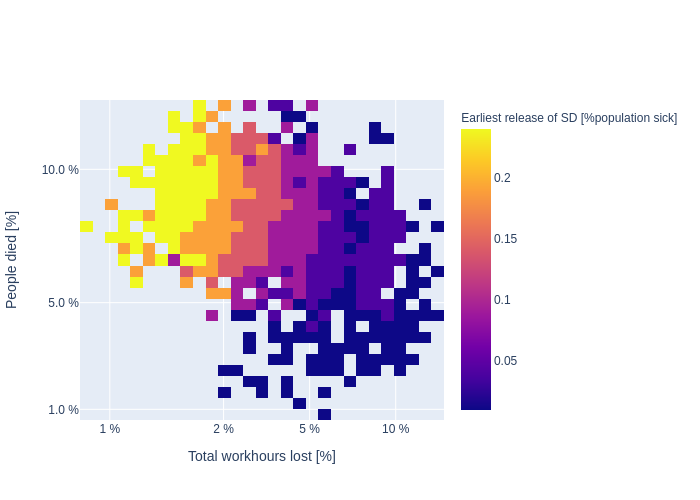

In [6]:
sub_df = df[df["RUN"] == 4]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=30, x="DEATH", y="WORKING", z="SD_STOP", reduce_op=np.max)
colorbar = dict(title="Earliest release of SD [%population sick]")
show_results(hist, w_steps, d_steps, colorbar)

Similar as above

### Sensitivity $I_{sick}$

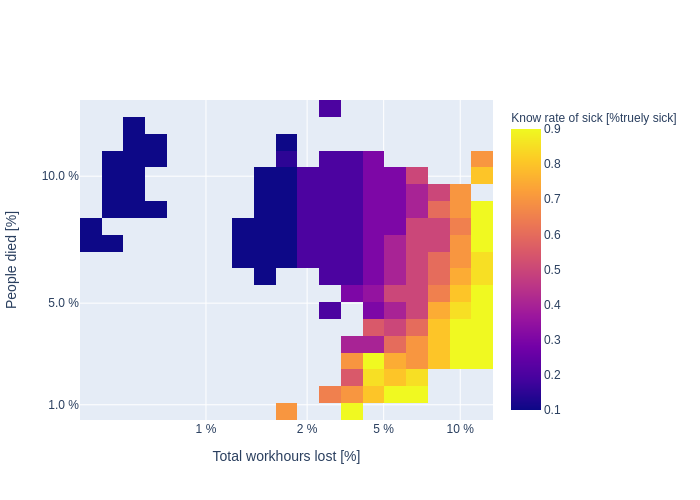

In [7]:
sub_df = df[df["RUN"] == 6]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=20, x="DEATH", y="WORKING", z="KNOW_RATE_SICK", reduce_op=np.median)
colorbar = dict(title="Know rate of sick [%truely sick]")
show_results(hist, w_steps, d_steps, colorbar)

The better we know how many people are sick, the more effective social distancing kicks in and the longer and less deadly the epidemic will be.

## 2.c.iii Immune pass

### Sensitivity $D_{recovered}$

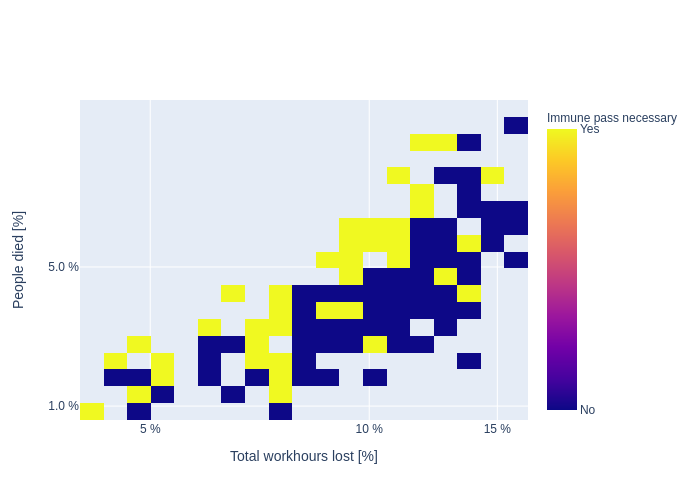

In [8]:
sub_df = df[df["RUN"] == 5]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=20, x="DEATH", y="WORKING", z="SD_RECOVERED", reduce_op=np.min)
colorbar = dict(title="Immune pass necessary", tickmode="array", tickvals=[0, 1], ticktext=["No", "Yes"])
show_results(hist, w_steps, d_steps, colorbar)

### Sensitivity $I_{recovered}$

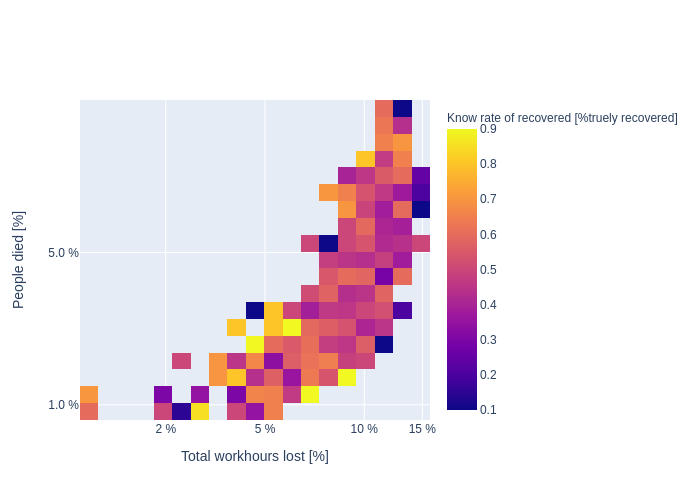

In [9]:
sub_df = df[df["RUN"] == 7]
sub_df = sub_df[sub_df["SD_RECOVERED"]== 1]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=20, x="DEATH", y="WORKING", z="KNOW_RATE_RECOVERED", reduce_op=np.mean)
colorbar = dict(title="Know rate of recovered [%truely recovered]")
show_results(hist, w_steps, d_steps, colorbar)

Again, the sensitivity analyses show that even the testing of the recovered does not play a major role in where the simulation lands in the matrix.

## 2.c.iv Corona party

### Sensitivity $R_{boost}$

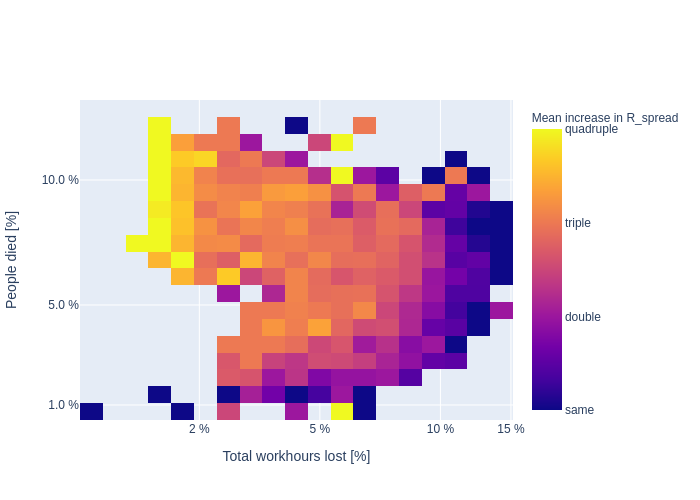

In [10]:
sub_df = df[df["RUN"] == 8]
sub_df = sub_df[sub_df["PARTY_FREQ"]!= 0]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=20, x="DEATH", y="WORKING", z="PARTY_R_BOOST", reduce_op=np.mean)
colorbar = dict(title="Mean increase in R_spread", tickmode="array", tickvals=[1, 2, 3, 4, 5],
                ticktext=["same", "double", "triple", "quadruple", "quintuble"])
show_results(hist, w_steps, d_steps, colorbar)

The graph shows that depending on the expected increase of $R_{spread}$ during the party day, stronger boosts will result in higher death rates.

Nonetheless, party boost is not a good predictor of how the simulation will play out.

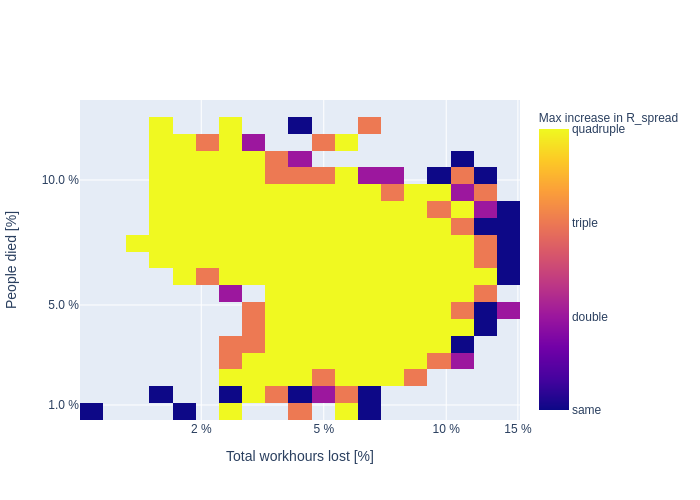

In [11]:
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=20, x="DEATH", y="WORKING", z="PARTY_R_BOOST", reduce_op=np.max)
colorbar = dict(title="Max increase in R_spread", tickmode="array", tickvals=[1, 2, 3, 4, 5],
                ticktext=["same", "double", "triple", "quadruple", "quintuble"])
show_results(hist, w_steps, d_steps, colorbar)

Even quadrupling the infectiousness of the disease during party day could land the simulation anywhere in the matrix.

### Sensitivity $P_{freq}$

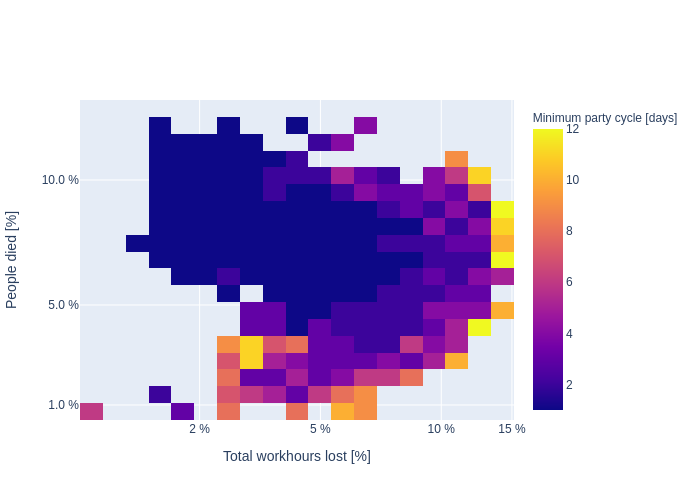

In [12]:
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=20, x="DEATH", y="WORKING", z="PARTY_FREQ", reduce_op=np.min)
colorbar = dict(title="Minimum party cycle [days]")
show_results(hist, w_steps, d_steps, colorbar)

So overall, the faster the party cycles the higher the death rates and the smaller the economic loss.

## 2.a Desease description

### Sensitivity $R_{duration}$

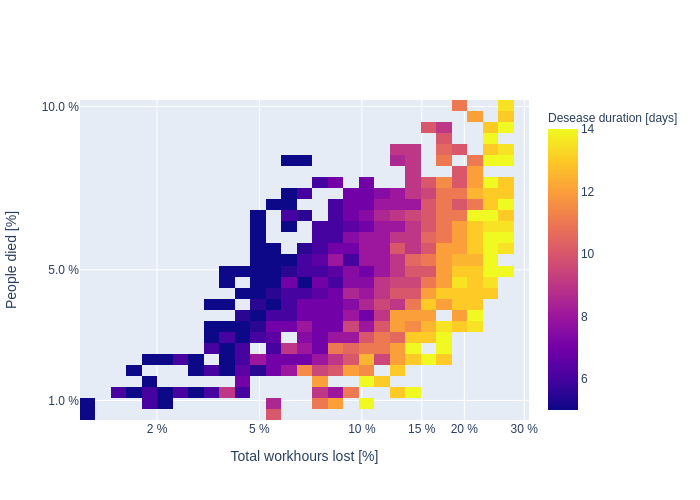

In [13]:
sub_df = df[df["RUN"] == 10]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=30, x="DEATH", y="WORKING", z="DESEASE_DURATION", reduce_op=np.median)
colorbar = dict(title="Desease duration [days]")
show_results(hist, w_steps, d_steps, colorbar)

Overall the desease duration shifts the death-rate/economic loss curve to the right, i.e., (higher death rates and economic losses)

### Sensitivity $R_{fatality}$

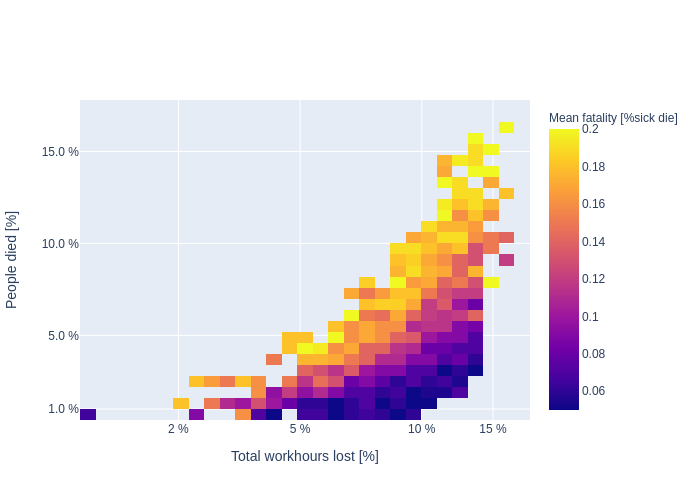

In [14]:
sub_df = df[df["RUN"] == 11]
sub_df.reset_index(inplace=True)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=30, x="DEATH", y="WORKING", z="FATALITY", reduce_op=np.median)
colorbar = dict(title="Mean fatality [%sick die]")
show_results(hist, w_steps, d_steps, colorbar)

Overall, higher fatality rates will increase the death rate, but not necessarily economic losses.

## 2.b Environnment description

### Sensitivity of number of agents

/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



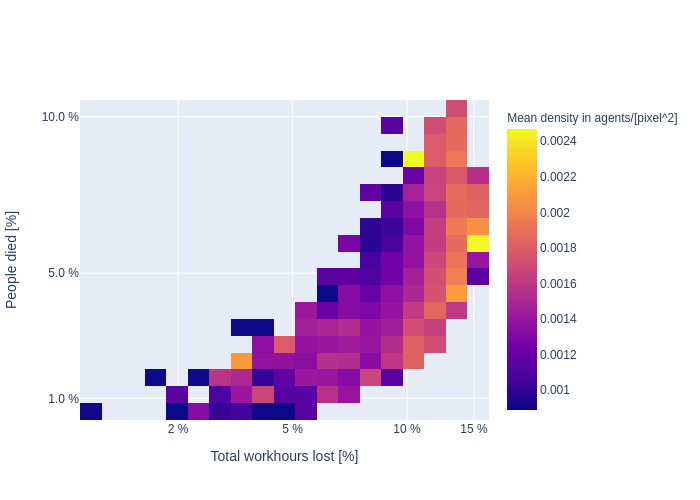

In [15]:
sub_df = df[df["RUN"] > 11]
sub_df.reset_index(inplace=True)
sub_df["DENSITY"] = sub_df["NUM_AGENTS"]/(sub_df["WIDTH"]**2)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=20, x="DEATH", y="WORKING", z="DENSITY", reduce_op=np.mean)
colorbar = dict(title="Mean density in agents/[pixel^2]")
show_results(hist, w_steps, d_steps, colorbar)

Overall the density of the simulation tends to increase death rate and economic loss. Still, it is a bad predictor for the outcome of a simulation.

/home/christian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



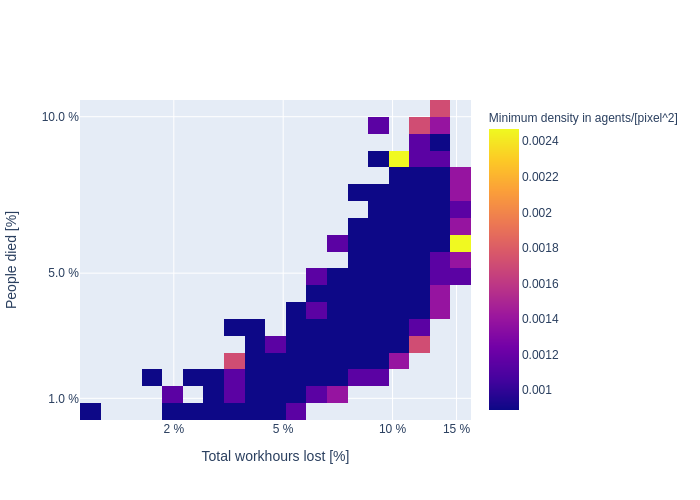

In [16]:
sub_df = df[df["RUN"] > 11]
sub_df.reset_index(inplace=True)
sub_df["DENSITY"] = sub_df["NUM_AGENTS"]/(sub_df["WIDTH"]**2)
hist, d_steps, w_steps = hist2d.get2d_hist(sub_df, bins=20, x="DEATH", y="WORKING", z="DENSITY", reduce_op=np.min)
colorbar = dict(title="Minimum density in agents/[pixel^2]")
show_results(hist, w_steps, d_steps, colorbar)